In [1]:
# ============================================
# 0. Imports y configuración general
# ============================================
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

pd.set_option("display.max_columns", 100)
pd.set_option("display.float_format", lambda x: f"{x:,.4f}")

RANDOM_STATE = 42


In [2]:
# ============================================
# 1. Carga de datos
# ============================================

PATH_TRAIN = "train.csv"
PATH_TEST = "test.csv"

train = pd.read_csv(PATH_TRAIN)
test = pd.read_csv(PATH_TEST)

print("Shape train:", train.shape)
print("Shape test :", test.shape)

train.head()


Shape train: (79800, 21)
Shape test : (34200, 20)


,id,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,41996,7hUhmkALyQ8SX9mJs5XI3D,Love and Rockets,Love and Rockets,Motorcycle,22,211533,False,0.3050,0.8490,9,-10.7950,1,0.0549,0.0001,0.0567,0.4640,0.3200,141.7930,4,goth
1,76471,5x59U89ZnjZXuNAAlc8X1u,Filippa Giordano,Filippa Giordano,"Addio del passato - From ""La traviata""",22,196000,False,0.2870,0.1900,7,-12.0300,0,0.0370,0.9300,0.0004,0.0834,0.1330,83.6850,4,opera
2,54809,70Vng5jLzoJLmeLu3ayBQq,Susumu Yokota,Symbol,Purple Rose Minuet,37,216506,False,0.5830,0.5090,1,-9.6610,1,0.0362,0.7770,0.2020,0.1150,0.5440,90.4590,3,idm
3,16326,1cRfzLJapgtwJ61xszs37b,Franz Liszt;YUNDI,Relajación y siestas,"Liebeslied (Widmung), S. 566",0,218346,False,0.1630,0.0368,8,-23.1490,1,0.0472,0.9910,0.8990,0.1070,0.0387,69.4420,3,classical
4,109799,47d5lYjbiMy0EdMRV8lRou,Scooter,Scooter Forever,The Darkside,27,173160,False,0.6470,0.9210,2,-7.2940,1,0.1850,0.0009,0.3710,0.1310,0.1710,137.9810,4,techno


In [3]:
# ============================================
# 2. Vista general de columnas y tipos
# ============================================

print("Info train:")
print(train.info())

print("\nInfo test:")
print(test.info())

print("\nColumnas train:", train.columns.tolist())
print("\nColumnas test:", test.columns.tolist())


Info train:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79800 entries, 0 to 79799
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                79800 non-null  int64  
 1   track_id          79800 non-null  object 
 2   artists           79800 non-null  object 
 3   album_name        79800 non-null  object 
 4   track_name        79800 non-null  object 
 5   popularity        79800 non-null  int64  
 6   duration_ms       79800 non-null  int64  
 7   explicit          79800 non-null  bool   
 8   danceability      79800 non-null  float64
 9   energy            79800 non-null  float64
 10  key               79800 non-null  int64  
 11  loudness          79800 non-null  float64
 12  mode              79800 non-null  int64  
 13  speechiness       79800 non-null  float64
 14  acousticness      79800 non-null  float64
 15  instrumentalness  79800 non-null  float64
 16  liveness          79800 non-

In [4]:
# Detectamos tipo de variables automáticamente
numeric_cols = train.select_dtypes(include=[np.number]).columns.tolist()
object_cols  = train.select_dtypes(include=["object", "bool"]).columns.tolist()

print("Numéricas:", numeric_cols)
print("Categóricas / texto:", object_cols)


Numéricas: ['id', 'popularity', 'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']
Categóricas / texto: ['track_id', 'artists', 'album_name', 'track_name', 'explicit', 'track_genre']


In [5]:
# ============================================
# 3. Valores faltantes
# ============================================

def missing_report(df, name="df"):
    na_count = df.isna().sum()
    na_pct = 100 * na_count / len(df)
    missing = pd.DataFrame({
        "columna": df.columns,
        "n_nulos": na_count.values,
        "%_nulos": na_pct.values
    }).sort_values("%_nulos", ascending=False)
    print(f"=== Missing values en {name} ===")
    display(missing)

missing_report(train, "train")
missing_report(test, "test")


=== Missing values en train ===


,columna,n_nulos,%_nulos
0,id,0,0.0000
1,track_id,0,0.0000
2,artists,0,0.0000
3,album_name,0,0.0000
4,track_name,0,0.0000
5,popularity,0,0.0000
6,duration_ms,0,0.0000
7,explicit,0,0.0000
8,danceability,0,0.0000
9,energy,0,0.0000


=== Missing values en test ===


,columna,n_nulos,%_nulos
3,album_name,1,0.0029
2,artists,1,0.0029
4,track_name,1,0.0029
1,track_id,0,0.0000
0,id,0,0.0000
5,duration_ms,0,0.0000
6,explicit,0,0.0000
7,danceability,0,0.0000
8,energy,0,0.0000
9,key,0,0.0000


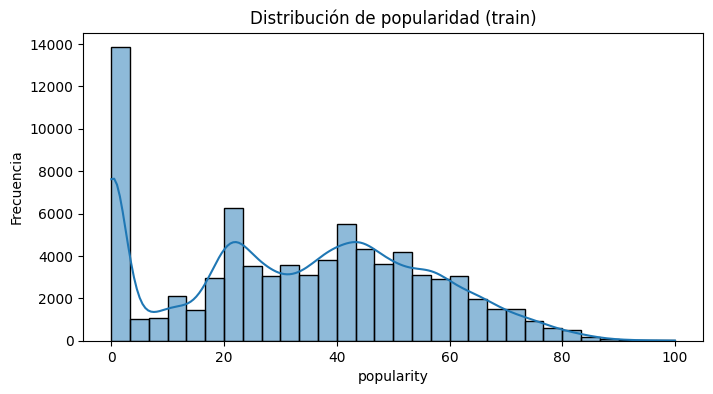

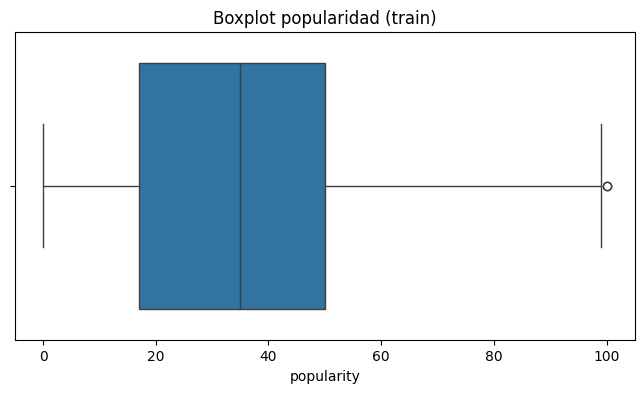

In [ ]:
# ============================================
# 4. Distribución de la variable objetivo
# ============================================

target_col = "popularity"

train[target_col].describe()

plt.figure(figsize=(8, 4))
sns.histplot(train[target_col], bins=30, kde=True)
plt.title("Distribución de popularidad (train)")
plt.xlabel("popularity")
plt.ylabel("Frecuencia")
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x=train[target_col])
plt.title("Boxplot popularidad (train)")
plt.xlabel("popularity")
plt.show()

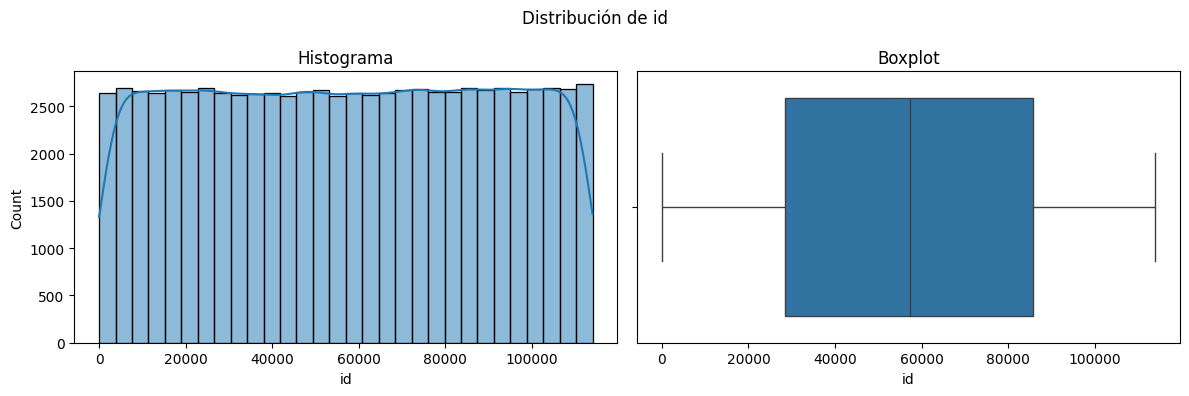

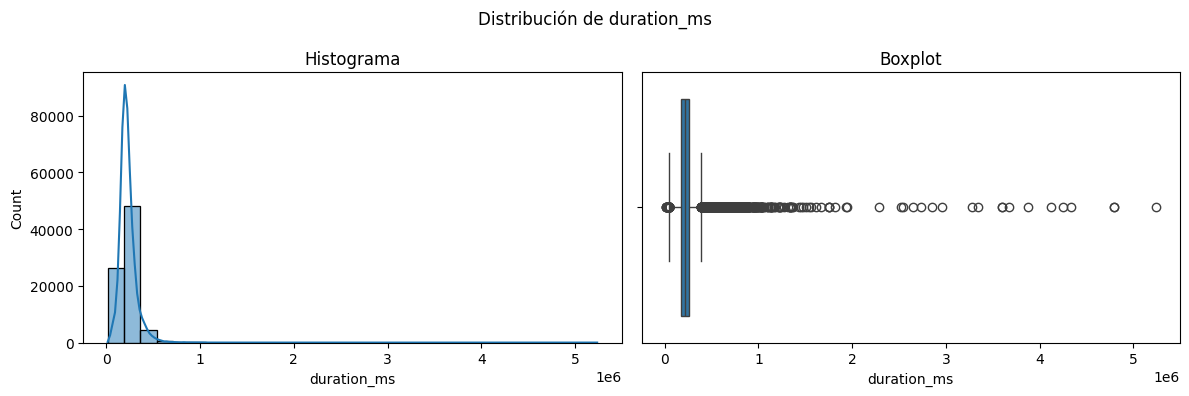

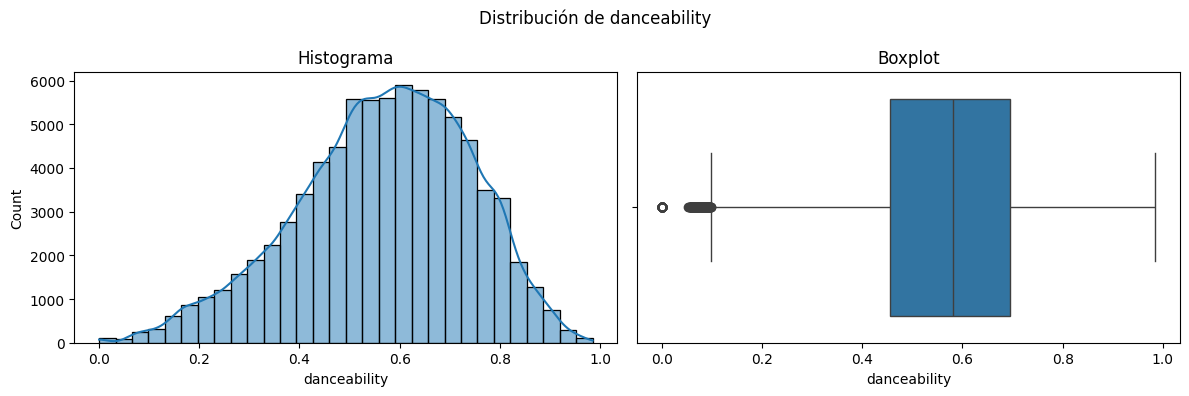

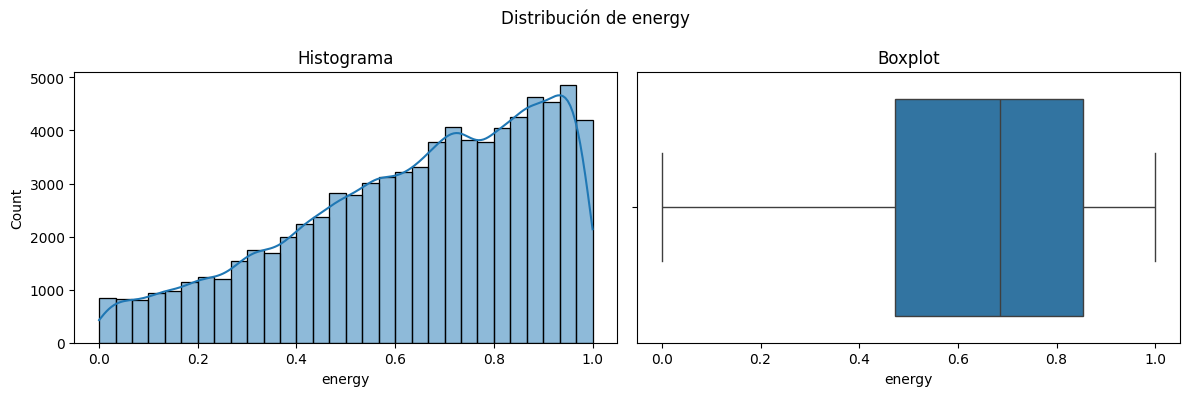

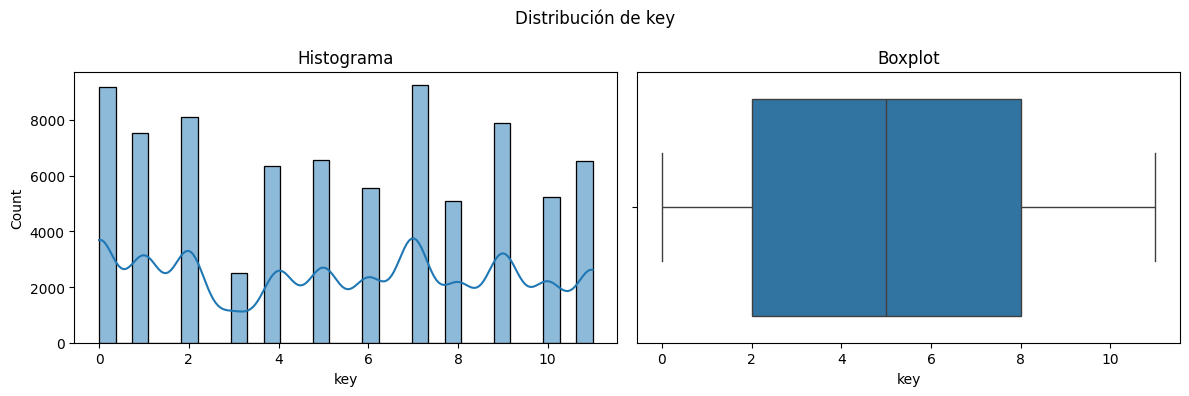

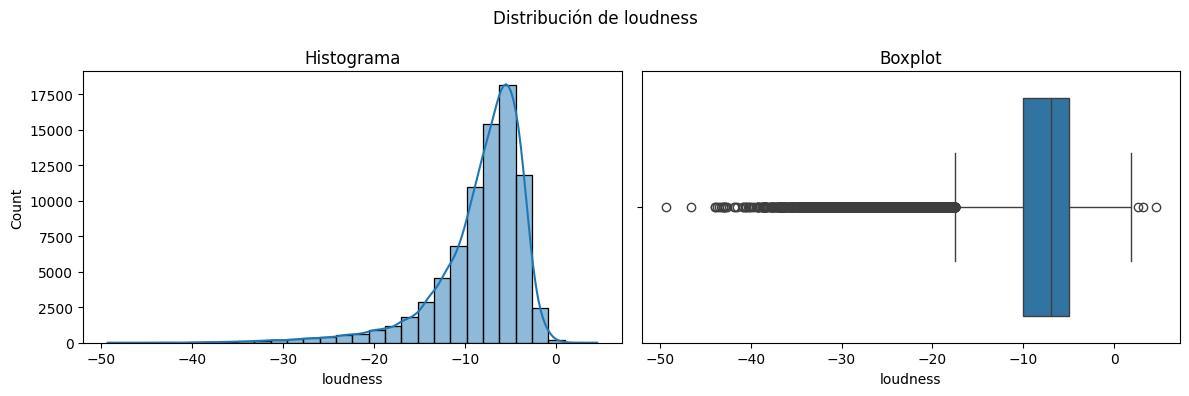

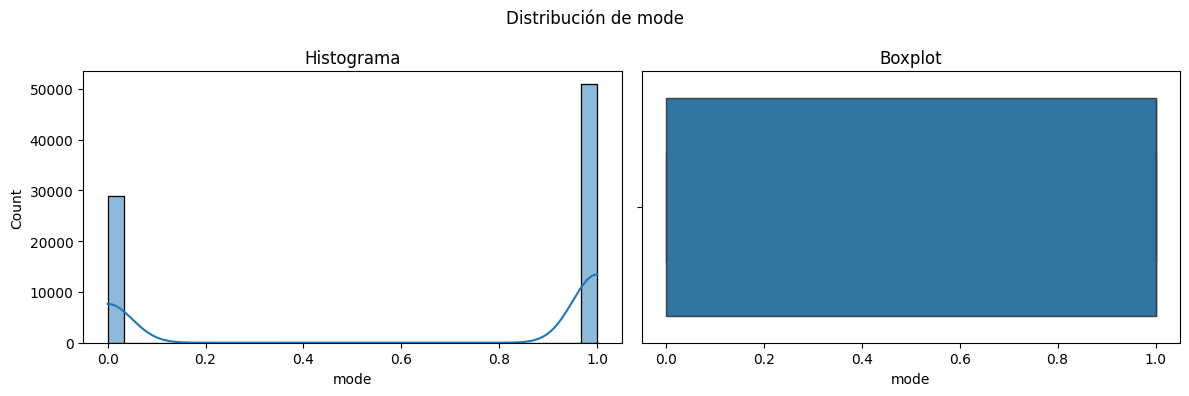

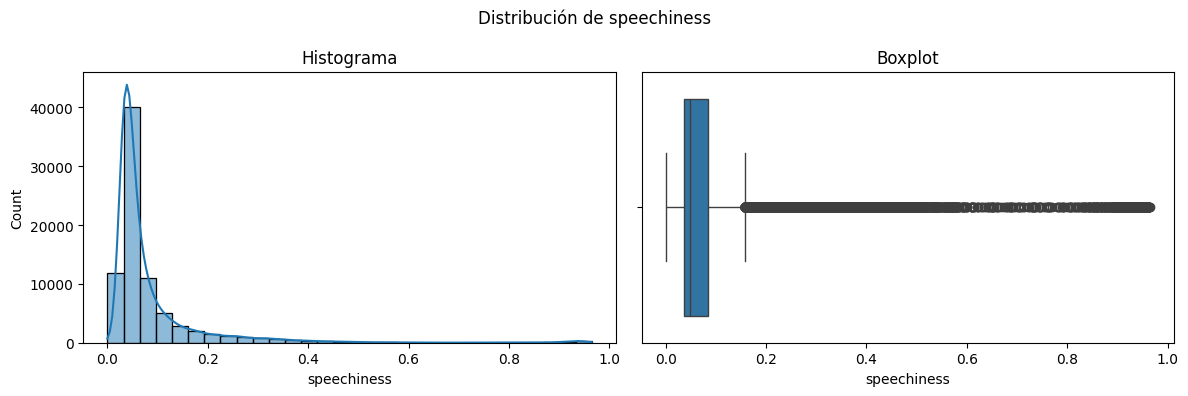

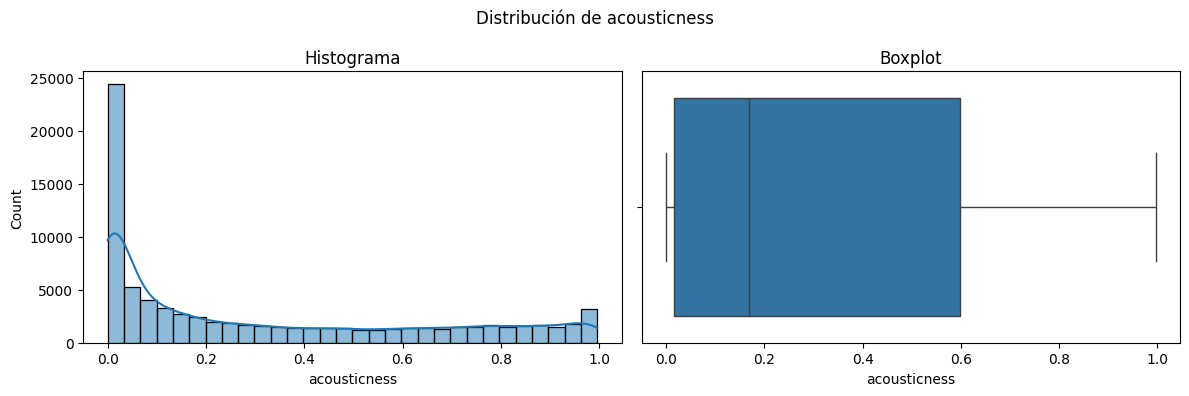

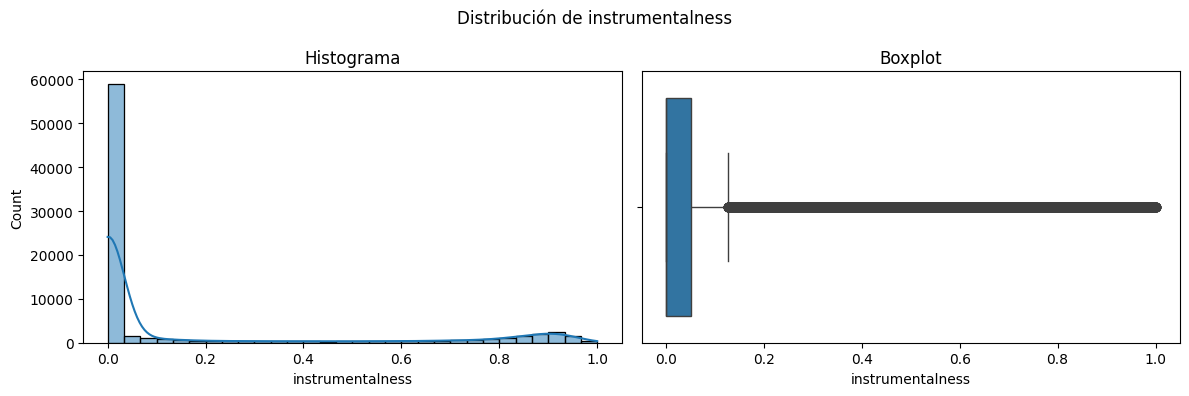

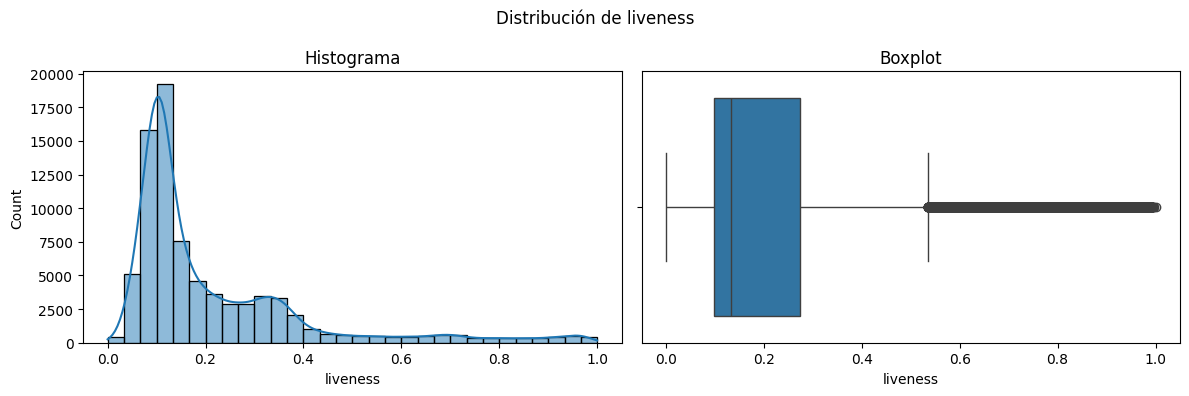

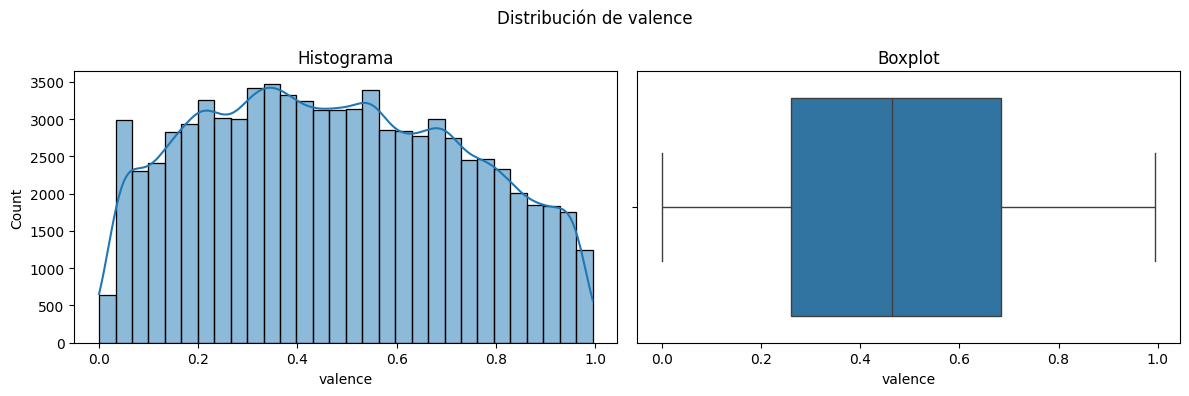

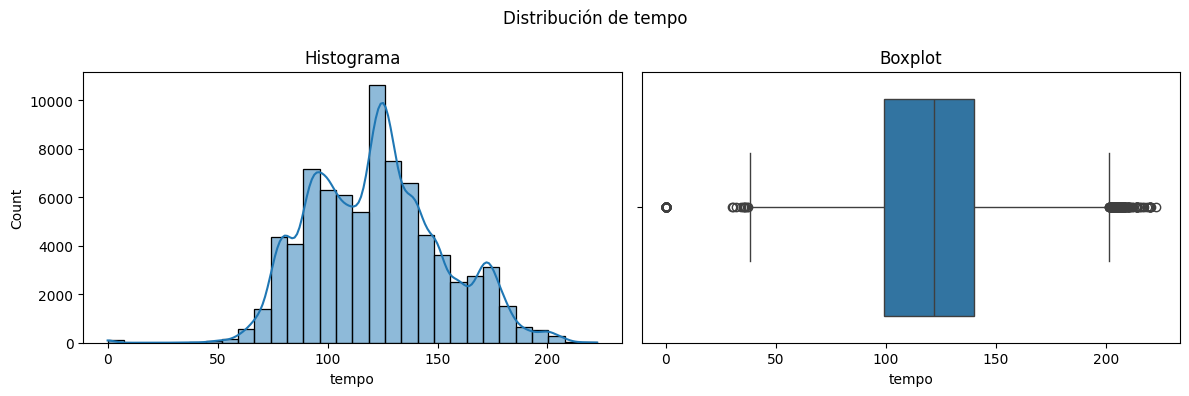

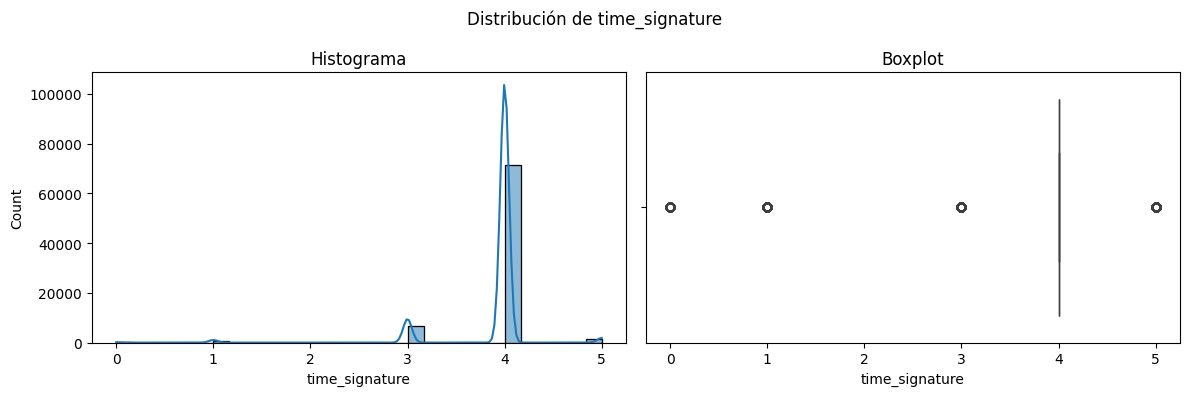

In [7]:
# ============================================
# 5. Variables numéricas: descriptivos
# ============================================

num_features = [col for col in numeric_cols if col != target_col]

train[num_features].describe().T
# Histograma y boxplot para cada variable numérica
for col in num_features:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle(f"Distribución de {col}")

    sns.histplot(train[col], bins=30, kde=True, ax=axes[0])
    axes[0].set_title("Histograma")
    
    sns.boxplot(x=train[col], ax=axes[1])
    axes[1].set_title("Boxplot")
    
    plt.tight_layout()
    plt.show()

In [8]:
# ============================================
# 6. Outliers por IQR
# ============================================

def outlier_iqr_stats(df, cols):
    rows = []
    for col in cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        outliers = df[(df[col] < lower) | (df[col] > upper)][col].count()
        rows.append({
            "columna": col,
            "Q1": q1,
            "Q3": q3,
            "IQR": iqr,
            "lower": lower,
            "upper": upper,
            "n_outliers": outliers,
            "%_outliers": 100 * outliers / len(df)
        })
    return pd.DataFrame(rows).sort_values("%_outliers", ascending=False)

outliers_df = outlier_iqr_stats(train, num_features)
outliers_df


,columna,Q1,Q3,IQR,lower,upper,n_outliers,%_outliers
9,instrumentalness,0.0000,0.0505,0.0505,-0.0758,0.1263,17645,22.1115
7,speechiness,0.0359,0.0845,0.0486,-0.0370,0.1574,9277,11.6253
13,time_signature,4.0000,4.0000,0.0000,4.0000,4.0000,8598,10.7744
10,liveness,0.0979,0.2730,0.1751,-0.1648,0.5357,6032,7.5589
5,loudness,-10.0060,-5.0000,5.0060,-17.5150,2.5090,4351,5.4524
1,duration_ms,"174,436.0000","261,426.0000","86,990.0000","43,951.0000","391,911.0000",3990,5.0000
12,tempo,99.0812,140.0540,40.9728,37.6221,201.5131,424,0.5313
2,danceability,0.4560,0.6950,0.2390,0.0975,1.0535,420,0.5263
0,id,"28,450.5000","85,774.2500","57,323.7500","-57,535.1250","171,759.8750",0,0.0000
3,energy,0.4720,0.8540,0.3820,-0.1010,1.4270,0,0.0000


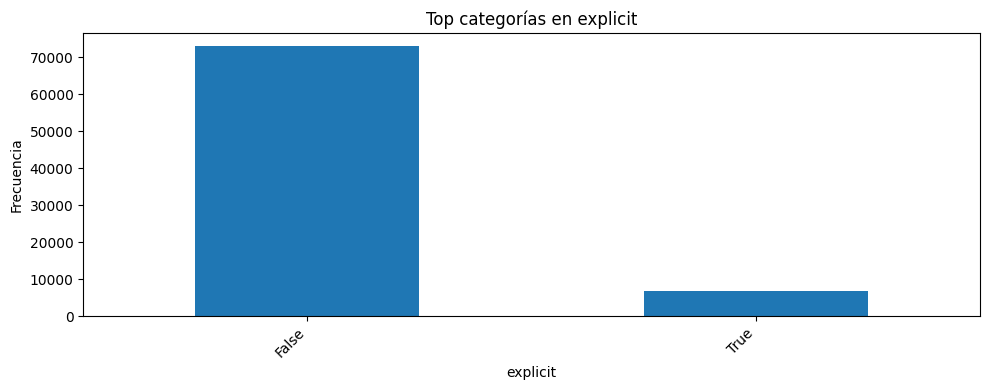

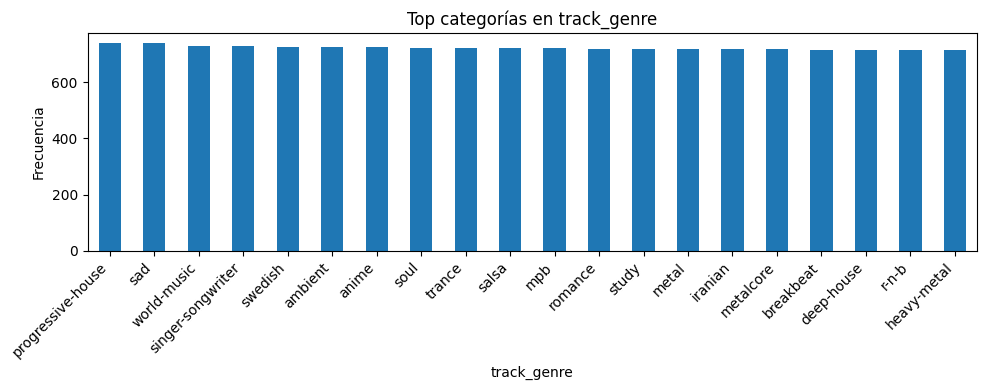

In [9]:
# ============================================
# 7. Categóricas: cardinalidad
# ============================================

cat_features = object_cols  # ya definidas antes

cardinalidad = (
    train[cat_features]
    .nunique()
    .reset_index()
    .rename(columns={"index": "columna", 0: "n_categorias"})
    .sort_values("n_categorias", ascending=False)
)

cardinalidad
# Podés elegir algunas, por ejemplo explicit y track_genre
categorias_a_graficar = ["explicit", "track_genre"]

for col in categorias_a_graficar:
    plt.figure(figsize=(10, 4))
    train[col].value_counts().head(20).plot(kind="bar")
    plt.title(f"Top categorías en {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()



In [ ]:
# ============================================
# 8. Comparación de distribuciones: train vs test
# ============================================

# 8.1. Estadísticos básicos numéricos
def compare_numeric(train, test, cols):
    res = []
    for col in cols:
        res.append({
            "columna": col,
            "train_mean": train[col].mean(),
            "test_mean": test[col].mean(),
            "diff_abs": abs(train[col].mean() - test[col].mean())
        })
    return pd.DataFrame(res).sort_values("diff_abs", ascending=False)

compare_numeric(train, test, num_features)
#col = "danceability"  # podés cambiar por otras

#plt.figure(figsize=(8, 4))
#sns.kdeplot(train[col], label="train", fill=True)
#sns.kdeplot(test[col], label="test", fill=True)
#plt.title(f"Distribución de {col}: train vs test")
#plt.legend()
#plt.show()



,columna,train_mean,test_mean,diff_abs
0,id,"57,140.4940","56,670.5139",469.9802
1,duration_ms,"227,902.1925","228,325.3945",423.2020
12,tempo,122.0766,122.3142,0.2376
5,loudness,-8.2637,-8.2478,0.0159
4,key,5.3070,5.3140,0.0070
13,time_signature,3.9026,3.9075,0.0049
9,instrumentalness,0.1573,0.1531,0.0042
2,danceability,0.5673,0.5656,0.0017
10,liveness,0.2133,0.2141,0.0008
11,valence,0.4743,0.4736,0.0007


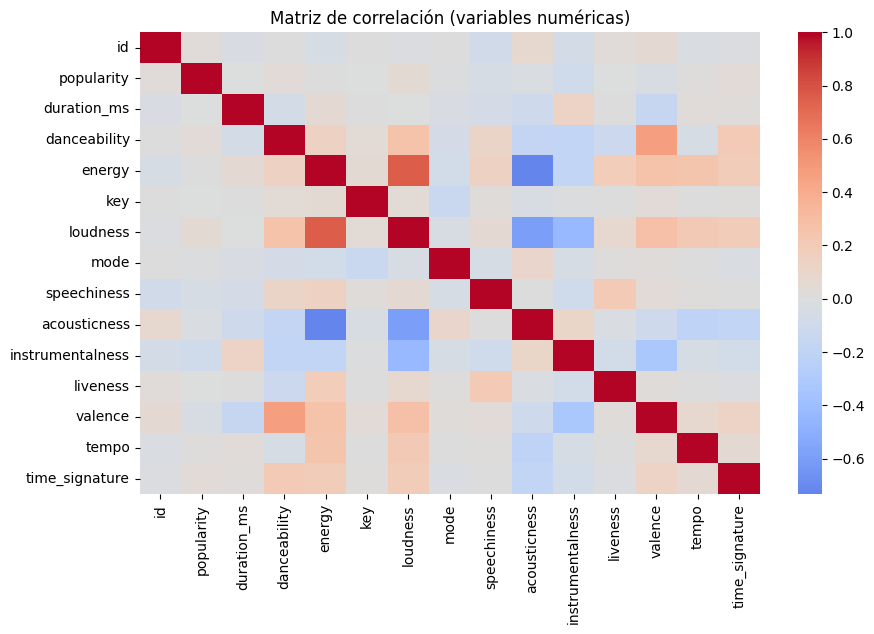

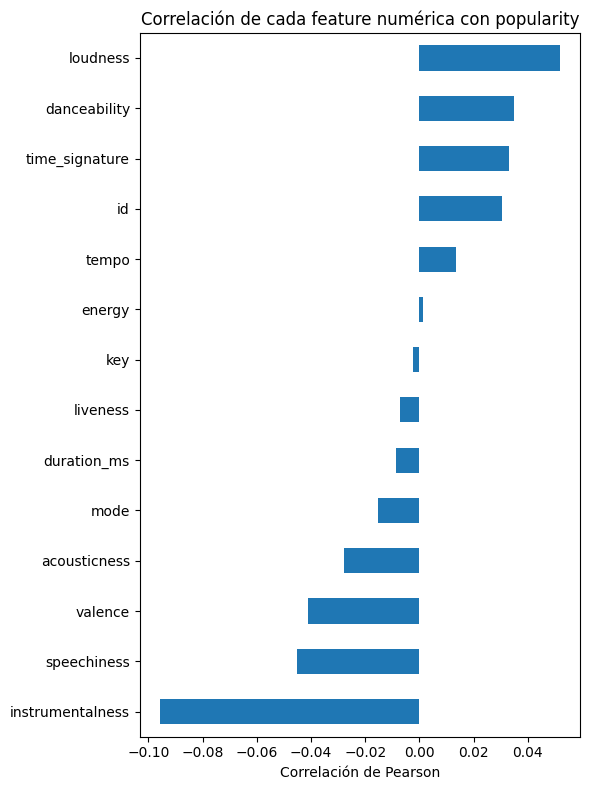

In [13]:
# ============================================
# 9. Matriz de correlación con la variable objetivo
# ============================================

corr_matrix = train[numeric_cols].corr()
corr_target = corr_matrix[target_col].sort_values(ascending=False)
corr_target
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", center=0)
plt.title("Matriz de correlación (variables numéricas)")
plt.show()

# Correlación ordenada con el target
plt.figure(figsize=(6, 8))
corr_target.drop(target_col).sort_values().plot(kind="barh")
plt.title("Correlación de cada feature numérica con popularity")
plt.xlabel("Correlación de Pearson")
plt.tight_layout()
plt.show()

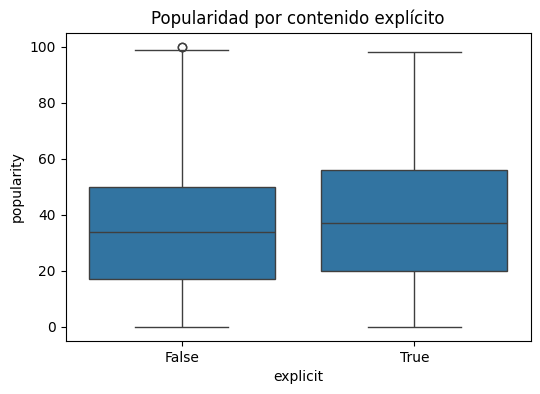

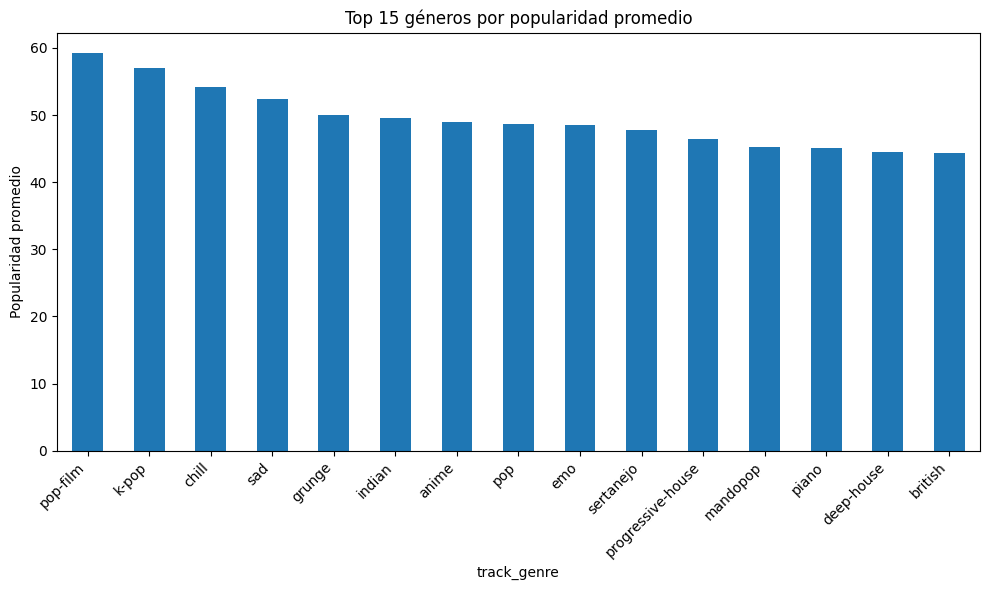

In [16]:
# ============================================
# 10. Popularidad vs variables categóricas
# ============================================

# Popularidad promedio por explicit
train.groupby("explicit")[target_col].mean().sort_values(ascending=False)
plt.figure(figsize=(6, 4))
sns.boxplot(data=train, x="explicit", y=target_col)
plt.title("Popularidad por contenido explícito")
plt.show()
# Popularidad promedio por género (top N)
mean_pop_by_genre = (
    train.groupby("track_genre")[target_col]
    .mean()
    .sort_values(ascending=False)
)

mean_pop_by_genre.head(15)
plt.figure(figsize=(10, 6))
mean_pop_by_genre.head(15).plot(kind="bar")
plt.title("Top 15 géneros por popularidad promedio")
plt.ylabel("Popularidad promedio")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
